# EDA e Predição de reviews de consumidores

## Bibliotecas

Primeiro vamos começar importando as bibliotecas necessárias para a primeira parte do projeto (pré-processamento e análise)

In [ ]:
import pandas as pd # para visualizar e mexer nos dados
import numpy as np # sempre bom importar numpy, né?

# para fazer algumas das análises:
from matplotlib import pyplot as plt 
import seaborn as sns 

# para o pré-processamento e algumas análises do texto:
import nltk 
import spacy 
import re 
from nltk.tokenize import word_tokenize  
nltk.download('stopwords')
nltk.download('punkt')
spc_en = spacy.load('en')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Carregando os dados

In [ ]:
# já vou carregar todos os dados de uma vez, e, para a análise, vou juntá-los
df_train = pd.read_csv('/content/video_games_reviews_train.csv')
df_test = pd.read_csv('/content/video_games_reviews_test.csv')
df_val = pd.read_csv('/content/video_games_reviews_dev.csv')

df_app = df_train.append(df_test)
df = df_app.append(df_val)
df.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013"
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011"
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013"
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013"
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011"


## Checando os dados

In [ ]:
df_train['reviewText'][6]

"Honestly I think this is pretty bad, and let me explain why.It says you can customize the opponents, the style of the tournament etc...This is all true. However other than the tournament settings, the changes seemed to have no effect. I wanted to simulate more of a real table with at least 1 bad player, an aggressive player, a tight player... etc. So I go in and change the parameters.However the opponents played the same way no matter what I did with them. I even changed the strength of each hand to total opposites of their defaults, and the opponents all played the same way. I don't think changing anything has any effect.I tested this thoroughly, I went and changed each opponent at a full table with various settings, playing with them for hours and still... they played just as they were playing before I altered them.It's ok as a simulator to play somewhat competent opponents under any style of tournament you want, but since that's all it is, and it doesn't do as advertised, I give it

In [ ]:
df.info() # informações do dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         12500 non-null  int64 
 1   index           12500 non-null  int64 
 2   reviewerID      12500 non-null  object
 3   asin            12500 non-null  object
 4   reviewerName    12357 non-null  object
 5   helpful         12500 non-null  object
 6   reviewText      12498 non-null  object
 7   overall         12500 non-null  int64 
 8   summary         12500 non-null  object
 9   unixReviewTime  12500 non-null  int64 
 10  reviewTime      12500 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum() # checando se o df possui dados nulos

level_0           0
index             0
reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
new_overall       0
dtype: int64

In [ ]:
df = df.dropna(axis=0)

In [ ]:
def binariza(nota):
  if nota > 3.9:
    return 'positive'
 
  return 'negative'

In [ ]:
df['new_overall'] = df['overall'].apply(binariza)

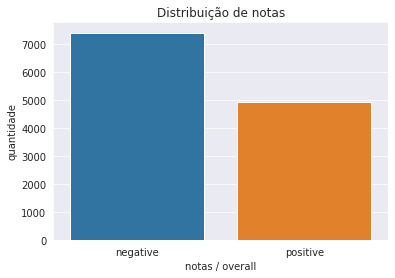

In [ ]:
# uma plotagem no geral para ver a distribuição das notas ao juntar os 3 dataframes
overall = sns.set_style('darkgrid')
overall = sns.countplot(x='new_overall', data=df)
overall.set_title('Distribuição de notas')
overall.set(xlabel='notas / overall', ylabel='quantidade')

plt.show()

## Análise antes do pré-processamento 

In [ ]:
# vou remover apenas os acentos e colocar tudo em minúsculo
def remove_acento(texto):

  # transforma as letras em minúsculas
  texto_min = texto.lower()

  # seleciona apenas letras
  txt_sem_acento = re.findall(r'[a-z]+', texto_min)

  return txt_sem_acento


In [ ]:
df['reviewText'] = df['reviewText'].str.strip('[')
df['reviewText'] = df['reviewText'].astype('str') # transformando em string

df['reviewText'] = df['reviewText'].apply(remove_acento)

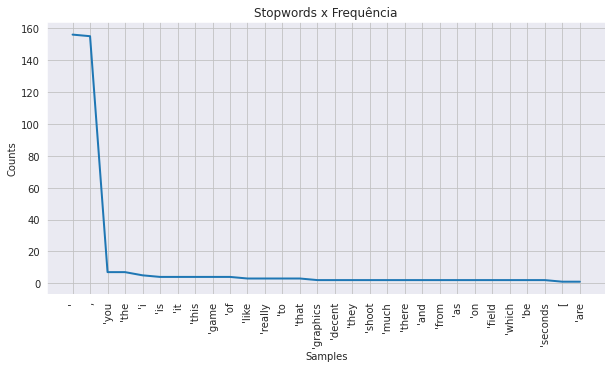

In [ ]:
df['reviewText'] = df['reviewText'].astype('str')


for linha in df['reviewText']:
  stopwords = word_tokenize(linha)

plt.figure(figsize=(10,5))
fd = nltk.FreqDist(stopwords)
fd.plot(30,title = "Stopwords x Frequência")

In [ ]:
def cria_df(df, num):
  '''Essa função recebe o df e o número da nota dada na coluna 'overall'
     e a partir disso, gera outro df apenas com as reviews referentes aquela
     nota.'''
     
  df = df[df['overall']==num]
  return df

In [ ]:
def cria_df(df, sentiment):
  '''Essa função recebe o df e o número da nota dada na coluna 'overall'
     e a partir disso, gera outro df apenas com as reviews referentes aquela
     nota.'''
     
  df = df[df['new_overall']=='sentiment']
  return df

In [ ]:
# df_negative = df[df['new_overall']=='negative']
# df_negative

In [ ]:
def plot(df, title):
  '''Essa função recebe um df ou uma coluna de um df e tokeniza o texto
     dessa coluna. Ela também recebe um titúlo, já que em seguida plota as
     frequências dos tokens'''
     
  for linha in df:
    tokens = word_tokenize(linha)
  
  plt.figure(figsize=(12,4))
  fd = nltk.FreqDist(tokens)
  fd.plot(30, title = title)

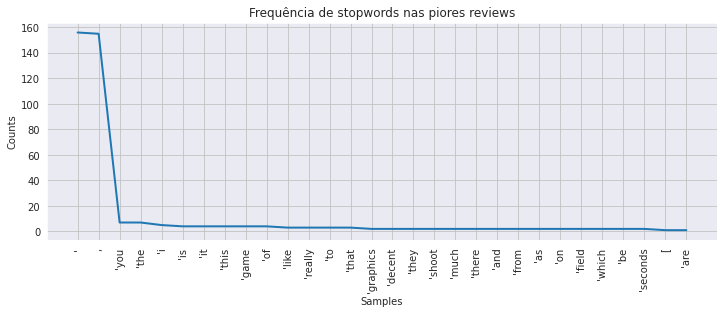

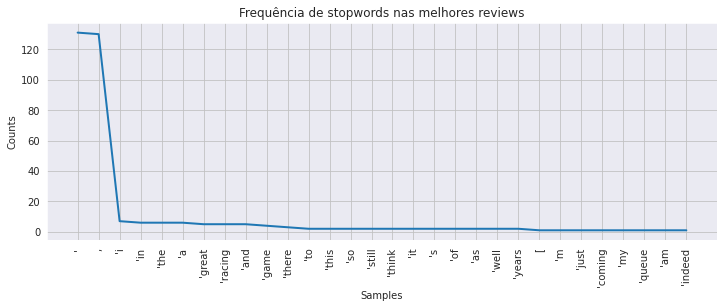

In [ ]:
df_negative = cria_df(df, 'negative')
df_positive = cria_df(df, 'positive')

plot(df_negative['reviewText'], title = "Frequência de stopwords nas piores reviews")

plot(df_positive['reviewText'], title = "Frequência de stopwords nas melhores reviews")

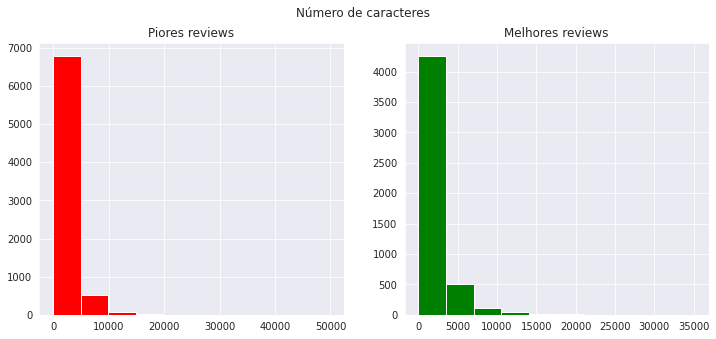

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
tweet_len=df[df['new_overall']=='negative']['reviewText'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Piores reviews')
tweet_len=df[df['new_overall']=='positive']['reviewText'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Melhores reviews')
fig.suptitle('Número de caracteres')

plt.show()

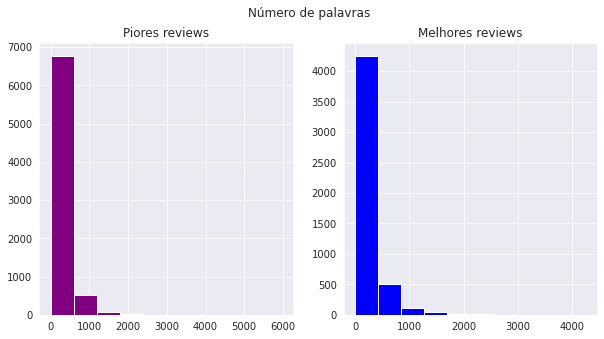

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['new_overall']=='negative']['reviewText'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='purple')
ax1.set_title('Piores reviews')
tweet_len=df[df['new_overall']=='positive']['reviewText'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='blue')
ax2.set_title('Melhores reviews')
fig.suptitle('Número de palavras')
plt.show()

## Pré-processamento 

In [ ]:
df_train['reviewText'] = df_train['reviewText'].astype('str') 
df_test['reviewText'] = df_test['reviewText'].astype('str') 
df_val['reviewText'] = df_val['reviewText'].astype('str') 

In [ ]:
def pre_processamento(texto):

  # transforma as letras em minúsculas
  texto_min = texto.lower()

  # seleciona apenas letras
  apenas_letras = re.findall(r'[a-z]+', texto_min)
  
  # removendo as stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  sem_stopwords = set(stopwords)
  palavras_importantes = []
  for palavra in apenas_letras:
    if palavra not in stopwords:
      palavras_importantes.append(palavra)

  palavras_importantes_string = " ".join(palavras_importantes)
  
  # instanciando o objeto spacy
  spc_letras =  spc_en(palavras_importantes_string)

  # lemmatização 
  tokens = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in spc_letras]
  
  # juntando os tokens 
  tokens_join = " ".join(tokens)
  
  return tokens_join

In [ ]:
df_train['reviewText'] = df_train['reviewText'].apply(pre_processamento)
df_test['reviewText'] = df_test['reviewText'].apply(pre_processamento)
df_val['reviewText'] = df_val['reviewText'].apply(pre_processamento)

In [ ]:
df_test.to_csv('df_test_pp.csv')
df_train.to_csv('df_train_pp.csv')
df_val.to_csv('df_val_pp.csv')

In [ ]:
dftrain = pd.read_csv('/content/df_train_pp.csv',index_col=0)

In [ ]:
dftest.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,12154,25980,A16416X67B4ZKJ,B00005V6BB,"""mcfly70""","[1, 1]",moh good reach couple last levels nothing game...,4,MOH: THE ACTUAL WAR WAS BETTER THE 3RD MCFLY R...,1035158400,"10 21, 2002"
1,7333,215010,A2Q2ADX9C9I5WZ,B00AZWE7ES,MCRC,"[0, 4]",glad pay game sony golden week sale technicall...,2,15 fps? really?,1399334400,"05 6, 2014"
2,6703,188851,A30IXQWBRD3GU9,B0053BCO00,Jerry,"[0, 0]",forget mario kart get mario kart ds one wii fu...,3,ehhhh,1373414400,"07 10, 2013"
3,5649,93541,A1S7NYZF69KYAP,B000VRCNLG,Peanut Pedro,"[0, 1]",purchase game amazon certainly look forward ar...,1,Defective Disk/Great Seller,1348963200,"09 30, 2012"
4,2955,24169,A2MPAOYEC1KWEI,B00005R5PO,Mali,"[0, 0]",love platform games many try crash bandicoot l...,4,It's not Spyro...,1073260800,"01 5, 2004"


## Análise pós pré-processamento

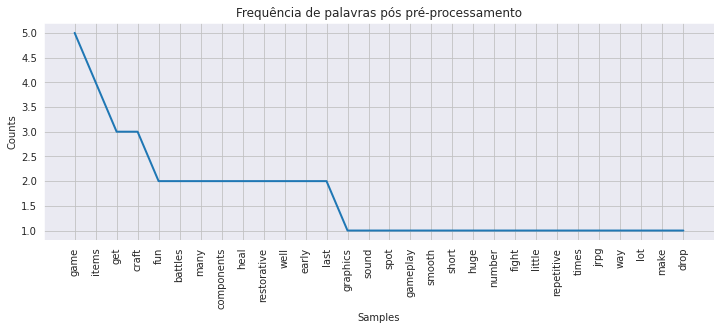

In [ ]:
# frequência de palavras
df['reviewText'] = df['reviewText'].astype('str') 
plot(df['reviewText'], 'Frequência de palavras pós pré-processamento')

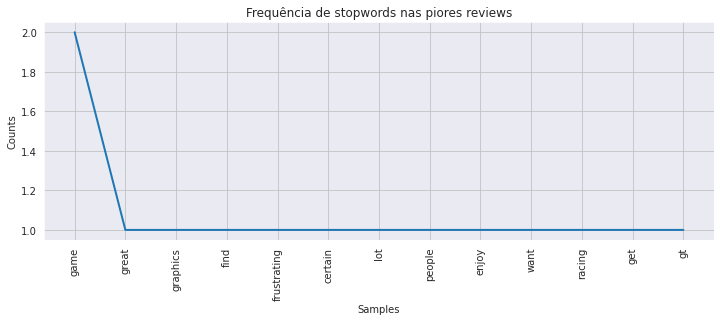

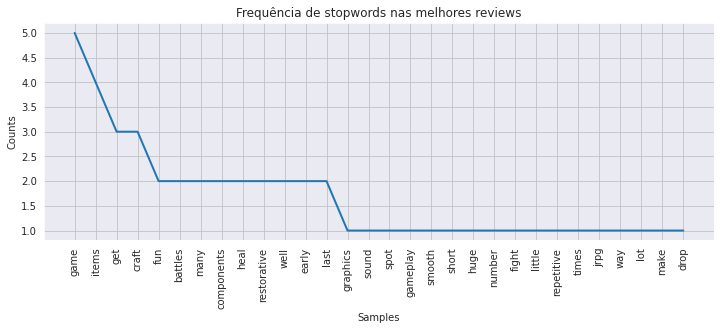

In [ ]:
# frequência de palavras nas piores reviews
df1_pp = cria_df(df, 1)
plot(df1_pp['reviewText'], title = "Frequência de stopwords nas piores reviews")

# frequência de palavras nas melhores reviews
df5_pp = cria_df(df, 5)
plot(df5_pp['reviewText'], title = "Frequência de stopwords nas melhores reviews")

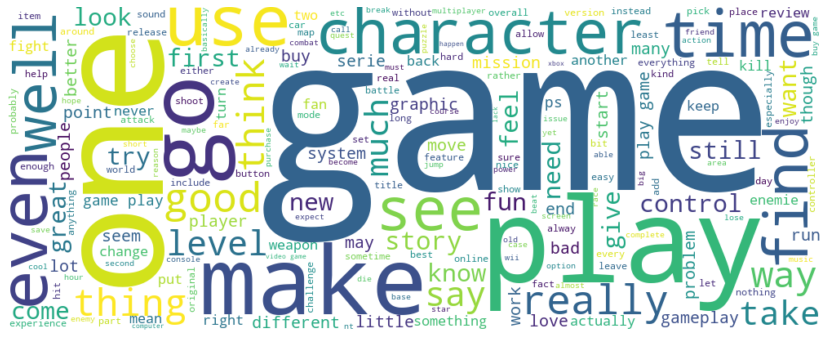

In [ ]:
from wordcloud import WordCloud

df['reviewText'] = df['reviewText'].astype('str')
tokens = []
for linha in df['reviewText']:
  tokens += word_tokenize(linha)

text = " ".join(tokens)
wordcloud = WordCloud(background_color="white", width=1000, height=400, collocations = True).generate(text)
fig = plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_text = nltk.Text(tokens)

In [ ]:
df_text.similar('game')

games play one like get really fun time graphics would make go first
story much good way great even think


In [ ]:
df_text.similar('hate')

game play like get good fun love one buy first great think give enjoy
much make bad go end try


In [ ]:
df_text.similar('love')

play game like fun get buy great good enjoy make think say first want
go games better give time one


In [ ]:
df_text.collocations(num=30, window_size=2)

single player; feel like; final fantasy; voice act; resident evil;
call duty; mass effect; replay value; cut scenes; mortal kombat; star
wars; super mario; tomb raider; pretty much; even though; silent hill;
years ago; person shooter; first person; black ops; highly recommend;
much better; year old; waste money; metal gear; story line; theft
auto; grand theft; long time; street fighter


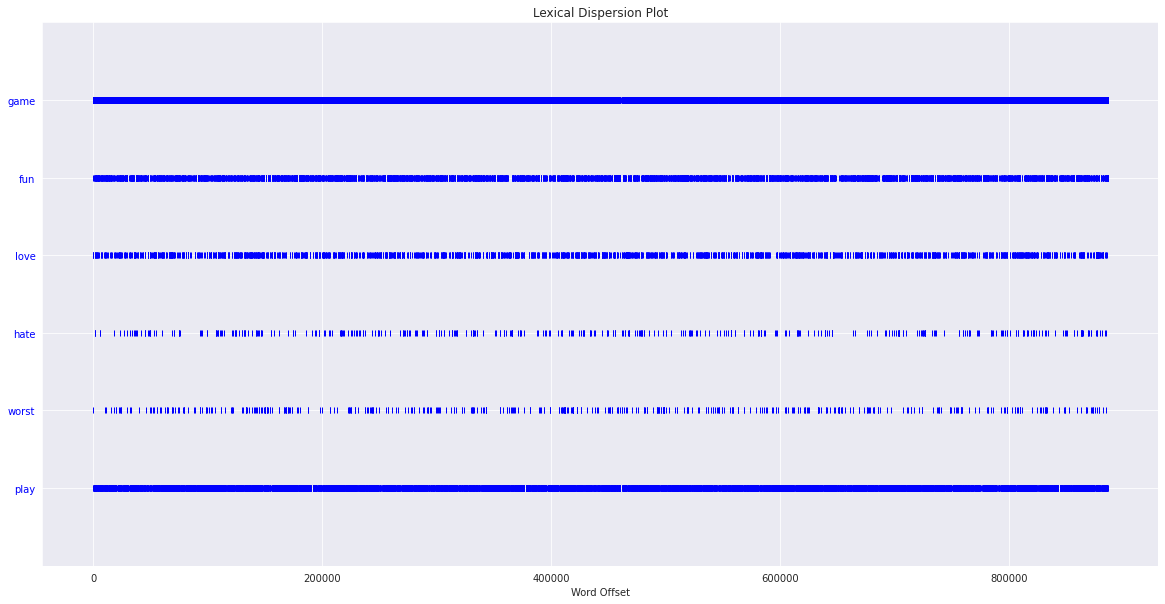

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
df_text.dispersion_plot(['game', 'fun', 'love', 'hate', 'worst', 'play'])

## Feature extraction

In [ ]:
dftrain = pd.read_csv('/content/df_train_pp.csv',index_col=0)
dftest = pd.read_csv('/content/df_test_pp.csv')
dfval =  pd.read_csv('/content/df_val_pp.csv')

# df = df.append(df_val)

In [ ]:
dftrain['new_overall'] = dftrain['overall'].apply(binariza)
dftest['new_overall'] = dftest['overall'].apply(binariza)
dfval['new_overall'] = dfval['overall'].apply(binariza)

In [ ]:
dftrain['reviewText'] = dftrain['reviewText'].astype('str')
dftest['reviewText'] = dftest['reviewText'].astype('str')

In [ ]:
# importando o CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# instanciado o CountVectorizer e adicionando o parâmetro binário 
vectorizer = CountVectorizer(binary=True, max_features=2500)
# vectorizer = TfidfVectorizer(max_features=1500)

# preparando o texto que será usado, ou seja, a coluna 'review'
text_train = dftrain['reviewText']
text_test = dftest['reviewText']

#Vamos ajustar o texto ao vector
vectorizer.fit(text_train)
vectorizer.fit(text_test)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# vamos então passar o texto para ser vectorizado
x_train = vectorizer.fit_transform(text_train)
x_test = vectorizer.transform(text_test) 

In [ ]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [ ]:
print(x_train.shape)
print(type(x_train))

print(x_test.shape)
print(type(x_test))

(8000, 2500)
<class 'numpy.ndarray'>
(2500, 2500)
<class 'numpy.ndarray'>


In [ ]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Aplicando o modelo

In [ ]:
#para separar os dados em base de treino e teste
# from sklearn.model_selection import train_test_split

# os modelos que vamos usar
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

# métricas para avaliação do modelo
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import classification_report 

In [ ]:
y_train = dftrain['new_overall']
y_test = dftest['new_overall']

In [ ]:
random_forest = RandomForestClassifier(max_depth=3, random_state=0) # instanciando o modelo
random_forest.fit(x_train, y_train) # ajustando o modelo ao classificador
y_pred = random_forest.predict(x_test) 

In [ ]:
random_forest.score(x_test, y_test) # acurácia

0.6048

In [ ]:
print(classification_report(y_test, y_pred)) #precision, recall, f1

              precision    recall  f1-score   support

    negative       0.60      1.00      0.75      1512
    positive       0.00      0.00      0.00       988

    accuracy                           0.60      2500
   macro avg       0.30      0.50      0.38      2500
weighted avg       0.37      0.60      0.46      2500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
logreg = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [ ]:
y2_pred = logreg.predict(x_test)
logreg.score(x_test, y_test) # acurácia

0.7892

In [ ]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      1512
    positive       0.74      0.72      0.73       988

    accuracy                           0.79      2500
   macro avg       0.78      0.78      0.78      2500
weighted avg       0.79      0.79      0.79      2500



In [ ]:
y_val = dfval['new_overall']

In [ ]:
text_val = dfval['reviewText']

# ajusta o texto ao vector
vectorizer.fit(text_val)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
x_val = vectorizer.transform(text_val) 
x_val = x_val.toarray()

In [ ]:
logreg = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
logreg.fit(x_val, y_val)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [ ]:
y_val_pred = logreg.predict(x_val)
logreg.score(x_val, y_val) # acurácia

0.932